In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./example_files/RSCCASN.csv')

In [3]:
df#date ro b onvane object mikhune

,DATE,RSCCASN
0,1992-01-01,6938
1,1992-02-01,7524
2,1992-03-01,8475
3,1992-04-01,9401
4,1992-05-01,9558
...,...,...
329,2019-06-01,21123
330,2019-07-01,21714
331,2019-08-01,23791
332,2019-09-01,19695


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     334 non-null    object
 1   RSCCASN  334 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [5]:
df=pd.read_csv('./example_files/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [17]:
df.columns = ['Sales']
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


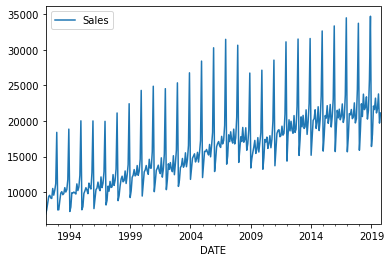

In [8]:
df.plot()

In [9]:
len(df)#334 mah ro darim

334

In [10]:
len(df) -18

316

In [11]:
test_size = 18 #18 mah barmidarim baraye test
test_ind = len(df) - test_size

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [13]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaled_train = scaler.fit_transform(train)

In [17]:
scaled_test = scaler.transform(test)

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
len(test)#chon validation darim nabayad batch ma az validation bishtar bashe
#validation darim ta befahmim k overfit nashe

18

In [20]:
length =12  #male batch mast
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size = 1)

In [21]:
X,y = generator[0]
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [22]:
y

array([[0.02047633]])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [24]:
n_features = 1

In [25]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#input_shape mishe tedade batch ba tedade feature ha
#yani 12 ta khune ghabli ro midim ta badish ro bgirim
#optimization weight haro ok mikone
#loss baraye moghayese ba meghdare asli hast

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
#age val loss ziyad shod stop mikonim yani dare overfit mishe

In [29]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test
                                          ,length=length,batch_size = 1)
#baraye test

In [30]:
model.fit_generator(generator=generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

#generator o validation o stop ro fit mikonim b model

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 304 steps, validate for 6 steps
Epoch 1/20
304/304 [==============================] - 4s 13ms/step - loss: 0.0236 - val_loss: 0.0025
Epoch 2/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0168 - val_loss: 0.0024
Epoch 3/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0109 - val_loss: 0.0136
Epoch 4/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0071 - val_loss: 0.0015
Epoch 5/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0025 - val_loss: 2.5610e-04
Epoch 6/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0017 - val_loss: 2.5226e-04
Epoch 7/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0019 - val_loss: 7.2310e-04
Epoch 8/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0018 - val_loss: 3.3146e-04


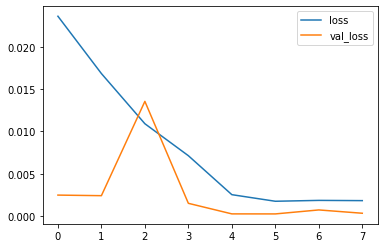

In [31]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [32]:
test_prediction = []

first_eval_batch = scaled_train[-length:] 
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range (len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [33]:
true_predictions = scaler.inverse_transform(test_prediction)

In [34]:
test['Predictions'] = true_predictions

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


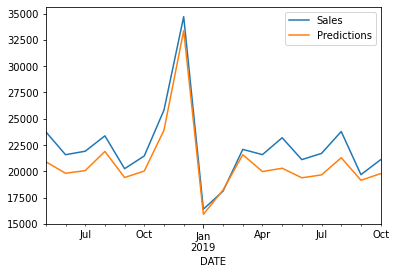

In [35]:
test.plot()

In [36]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)
#inja mikhaym prdict kole data baraye meghdare ayande ro bokonim pas kole data ro midim

In [37]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,
                                batch_size=1)

In [61]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator=generator,epochs=8)

  ...
    to  
  ['...']
Train for 322 steps
Epoch 1/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0236
Epoch 2/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0146
Epoch 3/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0081
Epoch 4/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0049
Epoch 5/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0028
Epoch 6/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0022
Epoch 7/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0015
Epoch 8/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0015


In [62]:
forecast = []


first_eval_batch = scaled_full_data[-length:] 
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range (12):#12 yani chand maho mikhaym pishbini konim
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [63]:
forecast = scaler.inverse_transform(forecast)

In [64]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [65]:
forecast_index = pd.date_range(start='2019-11-01',periods=12,freq='MS')
#index mikhaym pas migim az che date shoro kon baraye 12 bar o MS yani mah ro afzayesh bde
#o salo

In [66]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [67]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

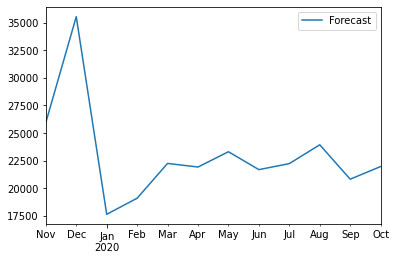

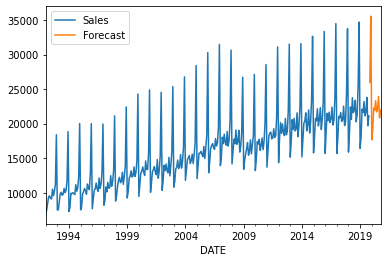

In [70]:
forecast_df.plot()
gs = df.plot()
forecast_df.plot(ax=gs)#be vasile ax mitunim begim 2ta cchio kenare ham bendaze

(574.0, 611.0)

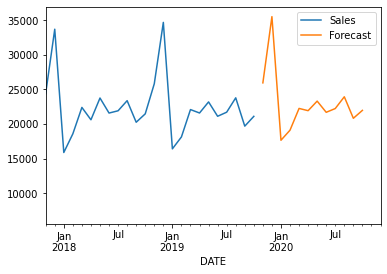

In [72]:
gs = df.plot()
forecast_df.plot(ax=gs)
plt.xlim('2017-11-01','2020-12-01')
#zoom mikonim